<a href="https://colab.research.google.com/github/oruns091/Data-Science-Projects/blob/master/Loan_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data Exploration and Analysis

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes = True)
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
train = pd.read_csv('/content/drive/My Drive/Google_Colab/train_ctrUa4K.csv')
train


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [ ]:
test = pd.read_csv('/content/drive/My Drive/Google_Colab/test_lAUu6dG.csv')
test

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [ ]:
train_original = train.copy()
test_original = test.copy()



In [ ]:
train.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [ ]:
train_original = train.copy()
test_original = test.copy()

In [ ]:
train.head(2) 
train.tail(2)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
train.shape

(614, 13)

In [ ]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [ ]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [ ]:
train.groupby('Loan_Status').size() # can check for class imbalance

Loan_Status
N    192
Y    422
dtype: int64

# Visualization

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0546e2d0f0>,
      dtype=object)

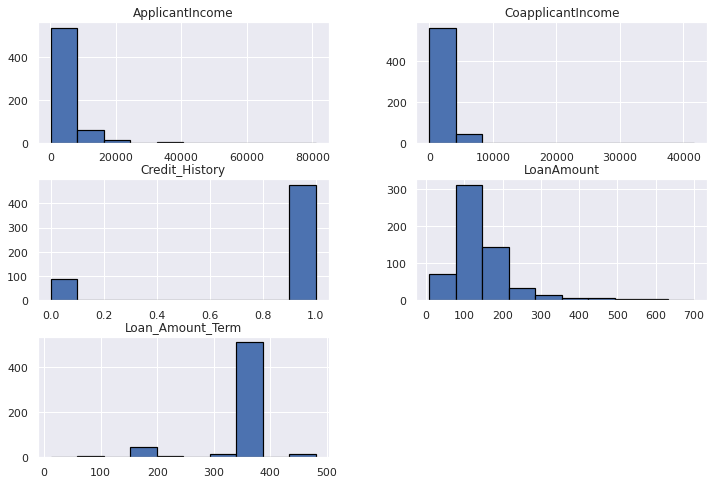

In [ ]:
train.hist(edgecolor='black', linewidth = 1.2, figsize=[12,8])

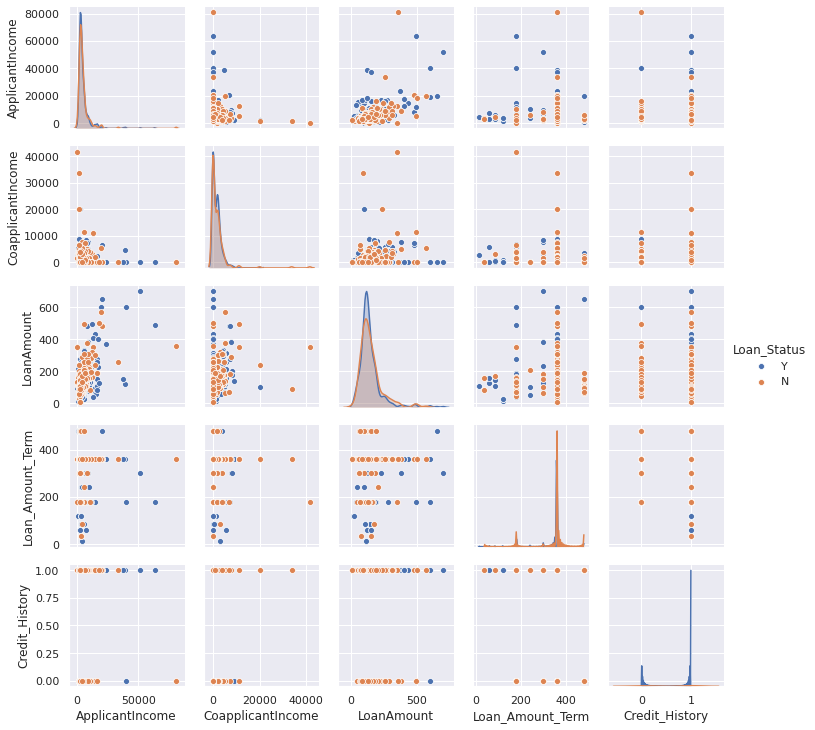

In [ ]:
sns.pairplot(train, hue='Loan_Status', size=2, aspect=1)

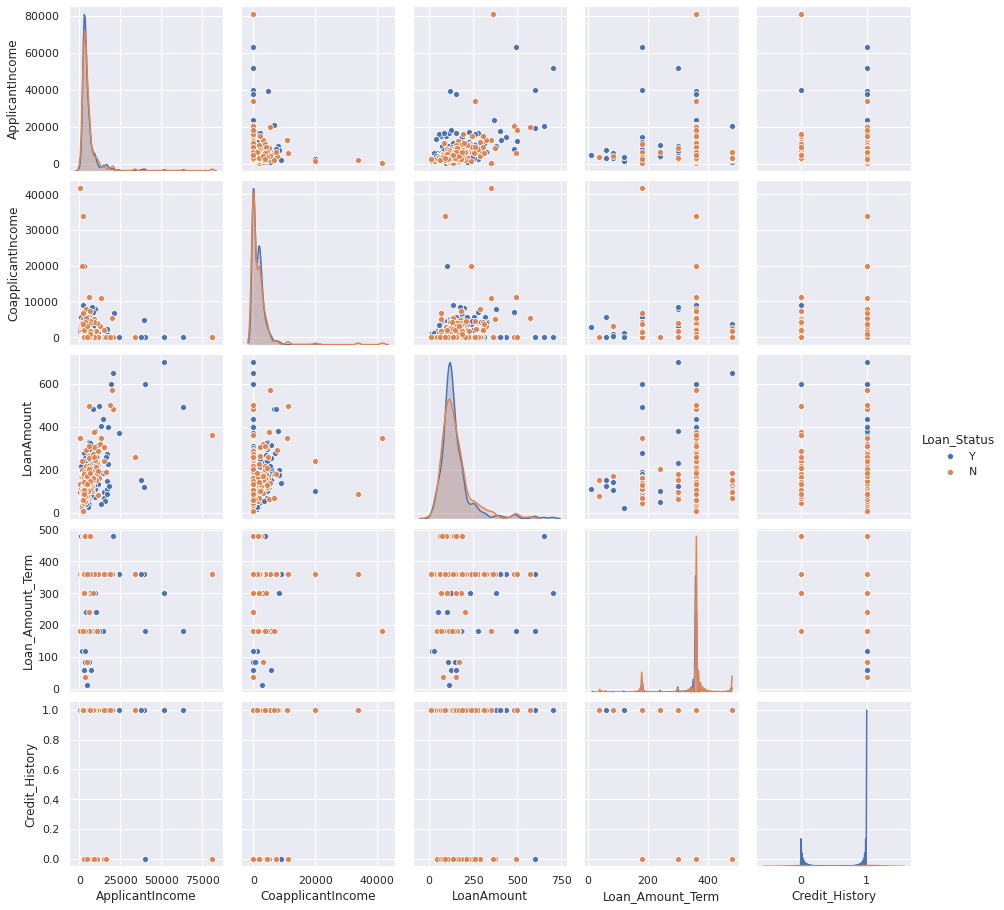

In [ ]:
sns.pairplot(train, hue="Loan_Status",diag_kind="kde");

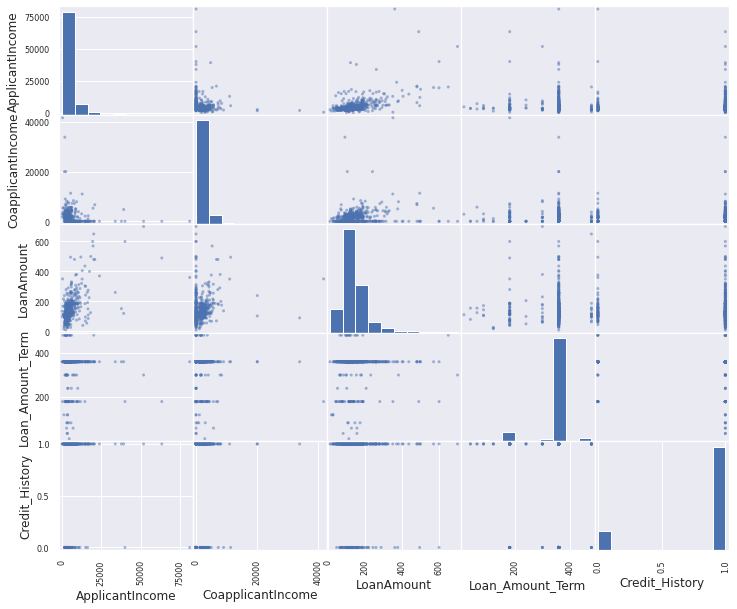

In [ ]:
pd.plotting.scatter_matrix(train, figsize=(12,10))
plt.show()

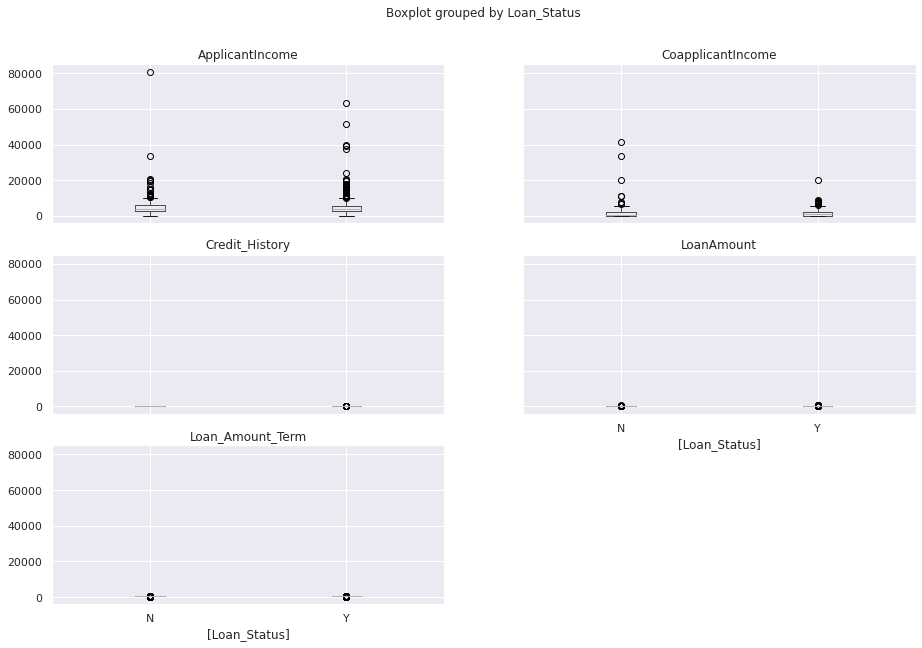

In [ ]:
train.boxplot(by='Loan_Status', figsize=(15,10));

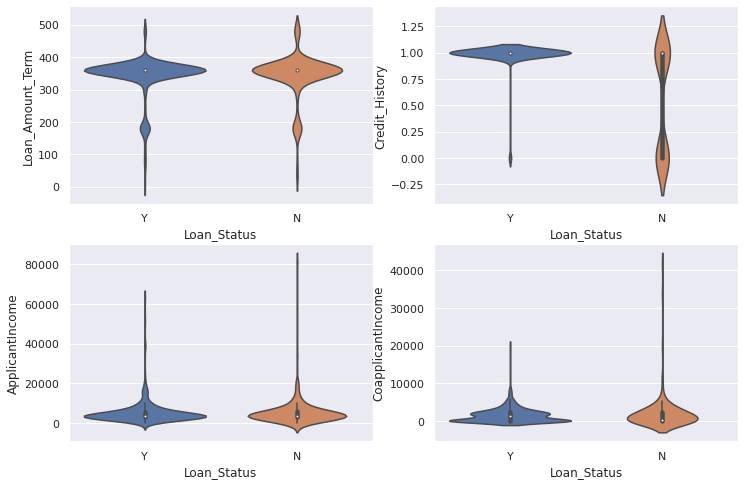

In [ ]:
plt.figure(figsize=(12,8));
plt.subplot(2,2,1)
sns.violinplot(x='Loan_Status', y='Loan_Amount_Term', data=train)
plt.subplot(2,2,2)
sns.violinplot(x='Loan_Status', y='Credit_History', data=train)
plt.subplot(2,2,3)
sns.violinplot(x='Loan_Status', y='ApplicantIncome', data =train )
plt.subplot(2,2,4)
sns.violinplot(x='Loan_Status', y = 'CoapplicantIncome', data = train);

# Check Null/Missing Values

In [ ]:
train.isnull().sum()  

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Handle Missing Value

In [ ]:
#impute means using a model to replace missing data, e.g., 0, mean, median, mode, regression, random. Use fillna()
#train.fillna(train.mean(), inplace=True

In [ ]:
#drop missing value rows
train.dropna(inplace = True)

In [ ]:
train.shape

(480, 13)

In [ ]:
# Use after converting Non-numeric values

# example of imputing missing values using scikit-learn
from numpy import nan
from numpy import isnan
from pandas import read_csv
from sklearn.impute import SimpleImputer

#Use Simple Imputer
values = train.values

# define the imputer
imputer = SimpleImputer(missing_values=nan, strategy='mean')

# transform the dataset
transformed_values = imputer.fit_transform(values)

# count the number of NaN values in each column
print('Missing: %d' % isnan(transformed_values).sum())

In [ ]:
# get unique values in each column
train.nunique()

Loan_ID              480
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      405
CoapplicantIncome    232
LoanAmount           186
Loan_Amount_Term       9
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [ ]:
train['Loan_Amount_Term'].unique() # get unique values for a column

array([360., 120., 180.,  60., 300., 480., 240.,  36.,  84.])

In [ ]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

# Categorical to Numerical Values

In [ ]:
# drop ID column
train_new = train.drop('Loan_ID',axis=1)
train_new

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [ ]:
# Address class imbalance problem
#using accuracy score to evaluate class imbalance problem can be misleading
#Classifier will predict the most common without performing any analysis

train_new['Loan_Status'].value_counts()

Y    332
N    148
Name: Loan_Status, dtype: int64

In [ ]:
# Transform into binary classification using IF/ELSE condition
train_new['Loan_Status'] = [1 if b=='Y' else 0 for b in train_new.Loan_Status]

train_new['Loan_Status'].value_counts()

1    332
0    148
Name: Loan_Status, dtype: int64

In [ ]:
# Using Label Encoder
#This can be used for class encoding too

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
train_new['Gender'] = le.fit_transform(train_new['Gender'])
train_new['Gender'].head(5)

train_new['Married'] = le.fit_transform(train_new['Married'])
train_new['Education'] = le.fit_transform(train_new['Education'])
train_new['Self_Employed'] = le.fit_transform(train_new['Self_Employed'])
train_new['Property_Area'] = le.fit_transform(train_new['Property_Area'])
train_new['Dependents'] = le.fit_transform(train_new['Dependents'])

In [ ]:
# another approach for change class labels using numpy
#train_new['Loan_Status']=np.where(train_new['Loan_Status'] == 1, 'Y', train_new['Loan_Status'])
train_new

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
5,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


# Class Imbalance

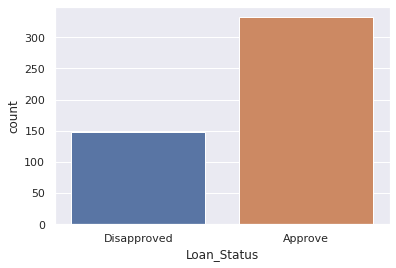

In [ ]:
# visualize the target variable
g = sns.countplot(train_new['Loan_Status'])
g.set_xticklabels(['Disapproved','Approve'])
plt.show()

In [ ]:

count_app= len(train_new[train_new['Loan_Status']==1])
count_disapp = len(train_new[train_new['Loan_Status']==0])
pct_of_app = count_app/(count_app + count_disapp)
print("percentage of no subscription is", pct_of_app*100)
pct_of_disapp = count_disapp/(count_app + count_disapp)
print("percentage of subscription", pct_of_disapp*100)

percentage of no subscription is 69.16666666666667
percentage of subscription 30.833333333333336


In [ ]:
#Get the mean of columns by group

mean_train_new = train_new.groupby('Property_Area').mean()

cols = ['Gender', 'Married', 'Self_Employed', 'Loan_Amount_Term', 'Credit_History']

mean_train_new1 = mean_train_new.drop(cols, axis =1)
mean_train_new1


,Dependents,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Status
Property_Area,,,,,,
0,0.805755,0.244604,5764.697842,1576.583597,155.640288,0.611511
1,0.732984,0.183246,5368.068063,1554.324607,146.057592,0.780105
2,0.806667,0.186667,4988.246667,1619.358667,132.946667,0.653333


In [ ]:
#Undersample or #Oversample
from sklearn.utils import resample

# Separate majority and minority classes
train_new_majority = train_new[train_new.Loan_Status==1]
train_new_minority = train_new[train_new.Loan_Status==0]
 
# Upsample minority class
train_new_minority_upsampled = resample(train_new_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=332,    # to match majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
train_new_upsampled = pd.concat([train_new_majority, train_new_minority_upsampled])
 
# Display new class counts
train_new_upsampled.Loan_Status.value_counts()


1    332
0    332
Name: Loan_Status, dtype: int64

# Correlation/Feature_Selection

In [ ]:
train_new.corr()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.349424,0.217510,0.059245,-0.002761,0.032644,0.156171,0.098975,-0.088704,0.022447,-0.000204,0.064504
Married,0.349424,1.000000,0.386367,0.001652,0.015674,0.036717,0.102950,0.183442,-0.107504,0.029095,0.038653,0.112321
Dependents,0.217510,0.386367,1.000000,0.028608,0.045754,0.131139,-0.000318,0.172780,-0.096361,-0.026651,0.001191,0.035428
Education,0.059245,0.001652,0.028608,1.000000,-0.005085,-0.131172,-0.074499,-0.172780,-0.102168,-0.056656,-0.055005,-0.068437
Self_Employed,-0.002761,0.015674,0.045754,-0.005085,1.000000,0.170785,-0.001509,0.120389,-0.034852,-0.023568,-0.050797,-0.034715
ApplicantIncome,0.032644,0.036717,0.131139,-0.131172,0.170785,1.000000,-0.112588,0.495310,-0.010838,-0.056152,-0.053160,-0.043152
CoapplicantIncome,0.156171,0.102950,-0.000318,-0.074499,-0.001509,-0.112588,1.000000,0.190740,-0.005775,-0.008692,0.006540,-0.049020
LoanAmount,0.098975,0.183442,0.172780,-0.172780,0.120389,0.495310,0.190740,1.000000,0.050867,-0.040773,-0.109685,-0.071753
Loan_Amount_Term,-0.088704,-0.107504,-0.096361,-0.102168,-0.034852,-0.010838,-0.005775,0.050867,1.000000,0.032937,-0.058656,-0.007798
Credit_History,0.022447,0.029095,-0.026651,-0.056656,-0.023568,-0.056152,-0.008692,-0.040773,0.032937,1.000000,-0.003013,0.529390


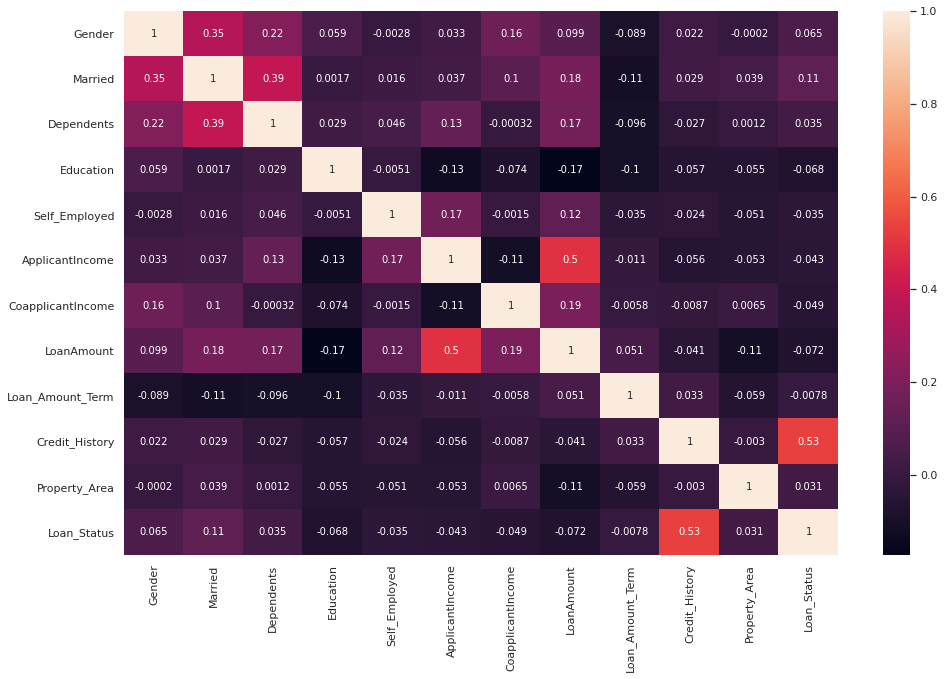

In [ ]:
# plot correlation heatmap

plt.figure(figsize=(16,10))
sns.heatmap(train_new.corr(), annot=True)
plt.show()

In [ ]:
# Create correlation matrix
corr_matrix = train_new.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.85
to_drop = [column for column in upper.columns if any(upper[column] > 0.85)]

In [ ]:
to_drop

[]

In [ ]:
train_new.drop(to_drop, axis=1, inplace=True)
train_new

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
5,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


# Train_Split_Test

In [ ]:
y = train_new.Loan_Status
X = train_new.drop('Loan_Status', axis =1)

In [ ]:
# Use if Test Set not provided

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.67, random_state =42)

X_train.shape
X_test.shape

(159, 11)

In [ ]:
train_new.columns.values

array(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area',
       'Loan_Status'], dtype=object)

In [ ]:
train_new.dtypes

Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status            int64
dtype: object

# Modeling

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
adaboost = AdaBoostClassifier( DecisionTreeClassifier() , n_estimators= 10 , learning_rate= 1 )
adaboost.fit(X_train, y_train)

y_pred_ada = adaboost.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred_ada))

Accuracy: 0.6875


In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
data_dmatrix = xgb.DMatrix(data=X_train,label=y_train)


In [ ]:
xgb_clf = xgb.XGBClassifier(max_depth=5, n_estimators=10000, learning_rate=0.3,
                            n_jobs=-1)


In [ ]:
xgb_clf.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.3, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=10000, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    '''
    print the accuracy score, classification report and confusion matrix of classifier
    '''
    if train:
        '''
        training performance
        '''
        print("Train Result:\n")
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_train, clf.predict(X_train))))
        print("Classification Report: \n {}\n".format(classification_report(y_train, clf.predict(X_train))))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_train, clf.predict(X_train))))

        res = cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy')
        print("Average Accuracy: \t {0:.4f}".format(np.mean(res)))
        print("Accuracy SD: \t\t {0:.4f}".format(np.std(res)))
        
    elif train==False:
        '''
        test performance
        '''
        print("Test Result:\n")        
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_test, clf.predict(X_test))))
        print("Classification Report: \n {}\n".format(classification_report(y_test, clf.predict(X_test))))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_test, clf.predict(X_test))))    
        

In [ ]:
print_score(xgb_clf, X_train, y_train, X_test, y_test, train=True)

Train Result:

accuracy score: 1.0000

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        99
           1       1.00      1.00      1.00       237

    accuracy                           1.00       336
   macro avg       1.00      1.00      1.00       336
weighted avg       1.00      1.00      1.00       336


Confusion Matrix: 
 [[ 99   0]
 [  0 237]]

Average Accuracy: 	 0.7742
Accuracy SD: 		 0.0722


In [ ]:
print_score(xgb_clf, X_train, y_train, X_test, y_test, train=False)

Test Result:

accuracy score: 0.6597

Classification Report: 
               precision    recall  f1-score   support

           0       0.50      0.35      0.41        49
           1       0.71      0.82      0.76        95

    accuracy                           0.66       144
   macro avg       0.60      0.58      0.59       144
weighted avg       0.64      0.66      0.64       144


Confusion Matrix: 
 [[17 32]
 [17 78]]



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.78


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[17 32]
 [ 0 95]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.35      0.52        49
           1       0.75      1.00      0.86        95

    accuracy                           0.78       144
   macro avg       0.87      0.67      0.69       144
weighted avg       0.83      0.78      0.74       144



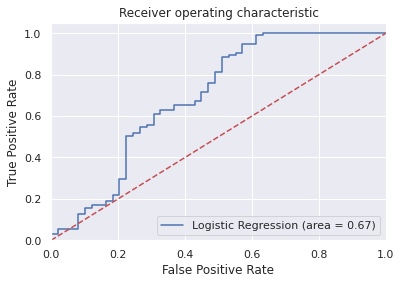

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()